### Normal distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_table("student-mat.csv",sep=";",header=0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
def mean_fuction(column):
    value = 0
    for i in range(len(column)):
        value += column[i]
    return value/len(column)

In [4]:
def variance(column):
    mean = 0
    for i in range(len(column)):
        mean += column[i]
    mean /= len(column)
    
    value = 0
    for i in range(len(column)):
        value += (column[i] - mean)**2
    value /= len(column)
    return value

In [5]:
# G1에 대한 평균과 분산 구하기
mean = mean_fuction(data['G1']) # 평균
std = np.sqrt(variance(data['G1']))

print(mean, std)

10.90886075949367 3.314990496708898


In [6]:
# normal distribution 설계 및 시각화
def normal_distribution(x, mean, std):
    temp = -((x - mean) ** 2) / (2 * (std ** 2))
    normal = 1 / (std * math.sqrt(2 * math.pi)) * np.exp(temp)
    return normal

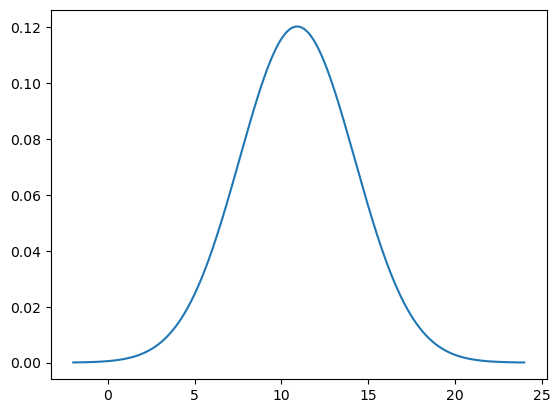

In [7]:
# 시각화
x_values = np.linspace(min(data['G1'])-5, max(data['G1']+5), 1000)
result = normal_distribution(x_values, mean, std)

plt.plot(x_values, result)
plt.show()

### Approximating normal with binomial

Text(0, 0.5, 'Probability Density')

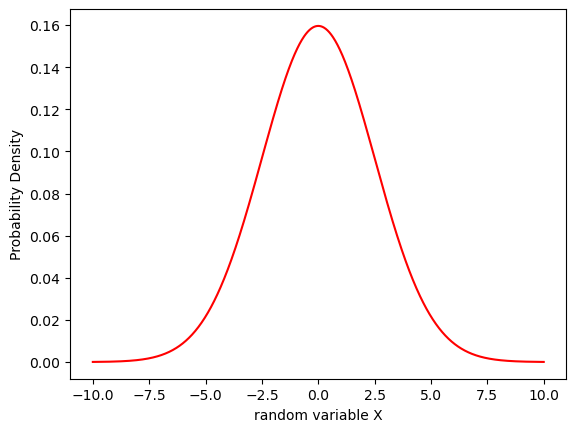

In [96]:
x = np.linspace(-10,10,1000)
mean = 0
std = 2.5
pdf = normal_distribution(x,mean,std)

plt.plot(x,pdf , color = 'red')
plt.xlabel('random variable X')
plt.ylabel('Probability Density')

In [97]:
import random

def next_action(p, step):
    if random.uniform(0, 1) < p:
        return -step
    else:
        return step

In [169]:
# 코드를 완성하시오. (변수 추가 및 수정 가능)
trial = 10000 # 구슬 개수 (최대 100,000)
score = 1/trial 
step = 0.5 # 층당 이동 거리
p = 0.5
floor = 24 # 층 개수

positions = []
for _ in range(trial):
    position = 0
    for _ in range(floor):
        position += next_action(p, step)
    positions.append(position)

PMF_x = list(set(positions))
PMF_x.sort()

PMF_y = [positions.count(pos) / trial for pos in PMF_x]

error:  0.02888967559554501


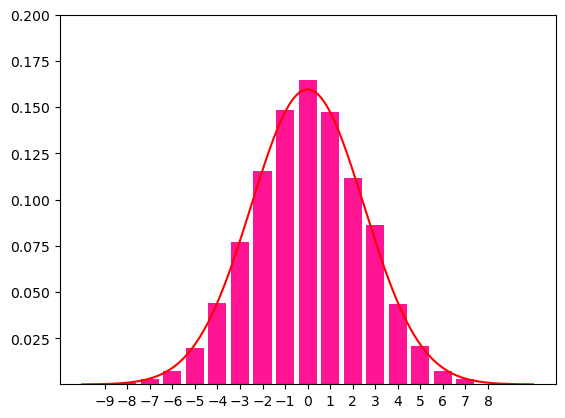

In [170]:
total_prob = sum(PMF_y)

def cal_error(result_x, result_y):
    error = 0
    for i in range(len(result_x)):
        error += abs(normal_distribution(result_x[i], mean, std)-result_y[i])
    print('error: ', error)

if abs(1-total_prob) > 0.0001 :
    print("확률의 총합이 1이 되지 않습니다")
else:
    cal_error(PMF_x, PMF_y)
    plt.bar(PMF_x, PMF_y, color='deeppink')
    plt.plot(x, pdf, color = 'red')
    plt.xticks(PMF_x)
    plt.ylim(min(PMF_y), 0.2)
    plt.show()